In [1]:
import os
import json
import pyqg_subgrid_experiments as pse
from pyqg_subgrid_experiments.models import ProbabilisticCNN
import matplotlib.pyplot as plt
import argparse
%load_ext autoreload
%autoreload 2

In [2]:
exps = ['PCNN_std_0_0001', 'PCNN_std_0_001', 'PCNN_var_0_0001', 'PCNN_var_0_001', 'PCNN_var_0_0001_regularization', 'PCNN_var_0_0001_regularization_0_1', 'PCNN_var_0_0001_regularization_1', 'PCNN_var_0_0001_var_mean', 'PCNN_var_0_0001_annealing', 'PCNN_var_0_0001_epoch_var_25', 'PCNN_var_0_0001_epoch_var_50', 'PCNN_var_0_0001_epoch_var_50_mean_linear']

In [4]:
parser = argparse.ArgumentParser()
parser.add_argument('--train_set', type=str, default="/scratch/zanna/data/pyqg/data/train/0.nc")
parser.add_argument('--test_set', type=str, default="/scratch/zanna/data/pyqg/data/test/0.nc")
parser.add_argument('--transfer_set', type=str, default="/scratch/zanna/data/pyqg/data/transfer/0.nc")
parser.add_argument('--save_dir', type=str, default="PCNN")
parser.add_argument('--inputs', type=str, default="u,v,q")
parser.add_argument('--targets', type=str, default="q_forcing_advection")
parser.add_argument('--zero_mean', type=int, default=1)
parser.add_argument('--num_epochs', type=int, default=50)
parser.add_argument('--layerwise_inputs', type=int, default=0)
parser.add_argument('--layerwise_targets', type=int, default=0)
parser.add_argument('--learning_rate', type=float, default=0.0001)
args = parser.parse_args("")

In [5]:
train = pse.Dataset(args.train_set)
test = pse.Dataset(args.test_set)
xfer = pse.Dataset(args.transfer_set)

In [6]:
param = pse.CNNParameterization.train_on(train, exps[-3],
            inputs=args.inputs.split(","),
            targets=args.targets.split(","),
            layerwise_inputs=False,
            layerwise_targets=True,
            zero_mean=args.zero_mean,
            num_epochs=1000,
            model_class=ProbabilisticCNN,
            learning_rate=0.0001,
            dataset_test = test,
            channel_type = 'var',            
            )

In [35]:
for i, model in enumerate(param.models):
    print('model number', i)
    model.check_channels()

model number 0
Current mode: True
Mode after eval(): False
min, max mean: -3.6023595333099365 18.581806182861328
min, max std : 238.25201416015625 1440.34375
model number 1
Current mode: True
Mode after eval(): False
min, max mean: -10.14991569519043 8.445009231567383
min, max std : 2.0383982292524278e-18 39.6862907409668


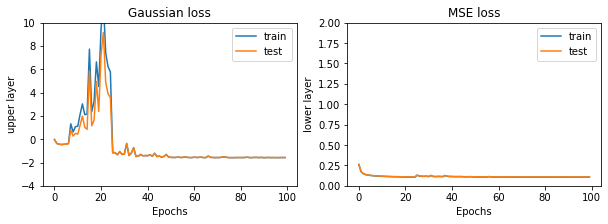

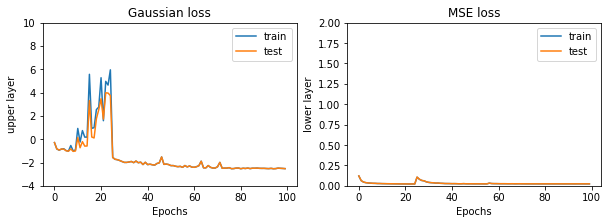

In [54]:
import matplotlib.pyplot as plt
import numpy as np
num_epochs = 100
for i in range(len(param.models)):
    plt.figure(figsize=(10,3))
    plt.subplot(121)
    plt.plot(np.arange(num_epochs),param.models[i].loss_history['train_gauss'], np.arange(num_epochs),param.models[i].loss_history['test_gauss'])
    plt.ylim([-4,10])
    plt.legend(['train', 'test'])
    plt.xlabel('Epochs')
    plt.title('Gaussian loss')
    plt.ylabel('upper layer')

    plt.subplot(122)
    plt.plot(np.arange(num_epochs),param.models[i].loss_history['train_mse'], np.arange(num_epochs),param.models[i].loss_history['test_mse'])
    plt.ylim([0,2])
    plt.legend(['train', 'test'])
    plt.xlabel('Epochs')
    plt.title('MSE loss')
    plt.ylabel('lower layer')

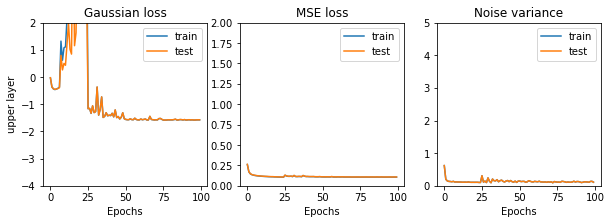

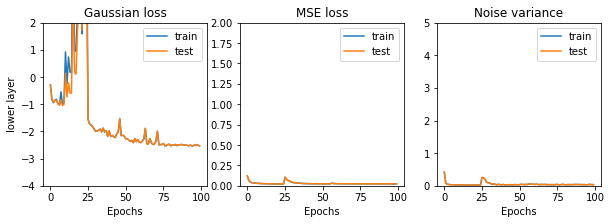

In [55]:
import matplotlib.pyplot as plt
import numpy as np
num_epochs = 100
for i in range(len(param.models)):
    plt.figure(figsize=(10,3))
    plt.subplot(131)
    plt.plot(np.arange(num_epochs),param.models[i].loss_history['train_gauss'], np.arange(num_epochs),param.models[i].loss_history['test_gauss'])
    plt.ylim([-4,2])
    plt.legend(['train', 'test'])
    plt.xlabel('Epochs')
    plt.title('Gaussian loss')
    if i == 0:
        plt.ylabel('upper layer')
    else:
        plt.ylabel('lower layer')

    plt.subplot(132)
    plt.plot(np.arange(num_epochs),param.models[i].loss_history['train_mse'], np.arange(num_epochs),param.models[i].loss_history['test_mse'])
    plt.ylim([0,2])
    plt.legend(['train', 'test'])
    plt.xlabel('Epochs')
    plt.title('MSE loss')
    
    plt.subplot(133)
    plt.plot(np.arange(num_epochs),param.models[i].loss_history['train_noise'], np.arange(num_epochs),param.models[i].loss_history['test_noise'])
    plt.ylim([0,5])
    plt.legend(['train', 'test'])
    plt.xlabel('Epochs')
    plt.title('Noise variance')

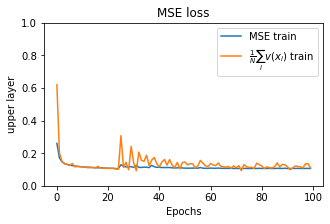

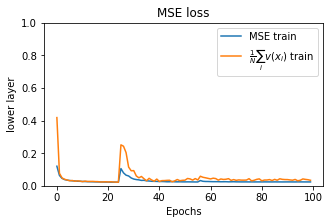

In [56]:
import matplotlib.pyplot as plt
import numpy as np
num_epochs = 100
for i in range(len(param.models)):
    plt.figure(figsize=(5,3))
    plt.plot(np.arange(num_epochs),param.models[i].loss_history['train_mse'])
    plt.plot(np.arange(num_epochs),param.models[i].loss_history['train_noise'])
    plt.ylim([0,1])
    plt.legend(['MSE train', r'$\frac{1}{N}\sum_i v(x_i)$ train'])
    plt.xlabel('Epochs')
    plt.title('MSE loss')
    if i == 0:
        plt.ylabel('upper layer')
    else:
        plt.ylabel('lower layer')

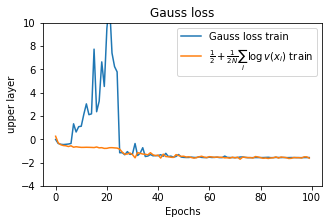

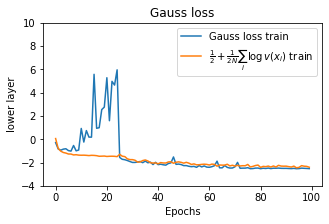

In [57]:
import matplotlib.pyplot as plt
import numpy as np
num_epochs = 100
for i in range(len(param.models)):
    plt.figure(figsize=(5,3))
    plt.plot(np.arange(num_epochs),param.models[i].loss_history['train_gauss'])
    plt.plot(np.arange(num_epochs),param.models[i].loss_history['train_log_noise'])
    plt.ylim([-4,10])
    plt.legend(['Gauss loss train', r'$\frac{1}{2} + \frac{1}{2N}\sum_i \log v(x_i)$ train'])
    plt.xlabel('Epochs')
    plt.title('Gauss loss')
    if i == 0:
        plt.ylabel('upper layer')
    else:
        plt.ylabel('lower layer')

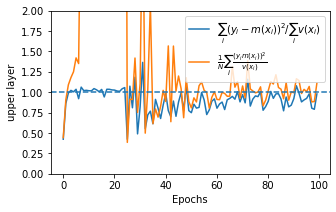

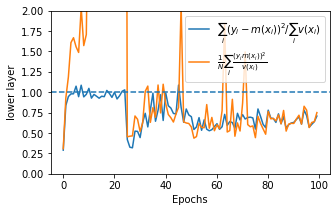

In [59]:
import matplotlib.pyplot as plt
import numpy as np
num_epochs = 100
for i in range(len(param.models)):
    plt.figure(figsize=(5,3))
    train_mse = np.array(param.models[i].loss_history['test_mse'])
    train_noise = np.array(param.models[i].loss_history['test_noise'])
    global_statistic = train_mse / train_noise
    train_gauss = np.array(param.models[i].loss_history['test_gauss'])
    train_log_noise = np.array(param.models[i].loss_history['test_log_noise'])
    local_statistic = 2.*(train_gauss - train_log_noise + 0.5)
    plt.plot(np.arange(num_epochs),global_statistic)
    plt.plot(np.arange(num_epochs),local_statistic)
    plt.ylim([0,2])
    plt.legend([r'$\sum_i (y_i-m(x_i))^2 / \sum_i v(x_i)$', 
              r'$\frac{1}{N} \sum_i \frac{(y_i m(x_i))^2}{v(x_i)}$'])
    plt.xlabel('Epochs')
    plt.axhline(y=1,linestyle='--')
    if i == 0:
        plt.ylabel('upper layer')
    else:
        plt.ylabel('lower layer')